<a href="https://colab.research.google.com/github/Theron55/Web_scraping_project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Ratings of Critics and Players in Games**

By: Nicholas Shin, Brady Deyak, Theron Hamlin

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import time
import bs4
from bs4 import BeautifulSoup
import requests


In [ ]:
gameMeta = ['https://www.metacritic.com/game/pc/counter-strike-global-offensive/critic-reviews', 'https://www.metacritic.com/game/pc/apex-legends/critic-reviews', 'https://www.metacritic.com/game/pc/dead-by-daylight/critic-reviews', 'https://www.metacritic.com/game/playstation-4/resident-evil-7-biohazard/critic-reviews']
gameMetaUser = ['https://www.metacritic.com/game/pc/counter-strike-global-offensive/user-reviews','https://www.metacritic.com/game/pc/apex-legends/user-reviews', 'https://www.metacritic.com/game/pc/dead-by-daylight/user-reviews', 'https://www.metacritic.com/game/playstation-4/resident-evil-7-biohazard/user-reviews']
gameSteam = ['https://store.steampowered.com/appreviews/730?json=1',"https://store.steampowered.com/appreviews/1172470?json=1", "https://store.steampowered.com/appreviews/381210?json=1", "https://store.steampowered.com/appreviews/418370?json=1"]
gameName = ['CS:GO', 'Apex Legends', 'Dead By Daylight', 'Resident Evil 7: Biohazard']
CombinedDF = pd.DataFrame()
soup_list_Steam = []

**Steam Reviews**

In [ ]:

def scrape_reviews(url, game_name):
    headers = {'Accept-Language': 'en-US,en;q=0.5'}
    params = {'json': '1', 'cursor': '*'}
    reviews = []
    while True:
        response = requests.get(url, headers=headers, params=params)
        data = response.json()
        for review in data['reviews']:
            reviews.append({'Game': game_name, 'Review': review['review'], 'Voted_Up': review['voted_up']})
            if len(reviews) == 1000:
                return reviews
        if not data['reviews']:
            return reviews
        cursor = data['cursor']
        params['cursor'] = cursor


reviews = []
for url, game_name in zip(gameSteam, gameName):
    reviews.extend(scrape_reviews(url, game_name))
dfSteam = pd.DataFrame(reviews)


**Writeup**

**MetaCritic Critic Reviews**

In [ ]:
soup_list_Meta = []
gamelist = []
headerMeta = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'}
dfMeta = pd.DataFrame()

for game in range(len(gameMeta)):
    responseMeta = requests.get(gameMeta[game], headers=headerMeta)
    soup_list_Meta.append(bs4.BeautifulSoup(responseMeta.text, 'html.parser'))
    review_statement = []
    for soup in soup_list_Meta:
        # Get all titles
        for review in soup.find_all("div", class_="review_body"):
            stripped = review.text.strip()
            review_statement.append(stripped.split('\n')[0])
            gamelist.append(gameName[game])

    df = pd.DataFrame()
    df['Game'] = gamelist[-len(review_statement):]
    df['Critic_Review'] = review_statement
    dfMeta = pd.concat([dfMeta, df], ignore_index=True)
dfMeta


,Game,Critic_Review
0,CS:GO,"It may lack some of the community niceties, be..."
1,CS:GO,Brilliant old-school shooter has convinced us ...
2,CS:GO,The new Counter Strike game is the king of tac...
3,CS:GO,"In the end, CS:GO is CS. There's something to ..."
4,CS:GO,"At the end, what matters is not if CS:GO is in..."
...,...,...
404,Resident Evil 7: Biohazard,A bold and successful reinvention of the franc...
405,Resident Evil 7: Biohazard,From its opening unhinged riff on Texas Chains...
406,Resident Evil 7: Biohazard,"best resident evil since 4, its actually scary..."
407,Resident Evil 7: Biohazard,This game isn't Resident Evil I give it a 4 ov...


**MetaCritic User Reviews**

In [ ]:
dfMetaUser = pd.DataFrame(columns=['game', 'Meta_Review'])

for i, url in enumerate(gameMetaUser):
    game = gameName[i]
    for page_num in range(45):
        page_url = f"{url}?page={page_num}"
        response = requests.get(page_url, headers={'User-Agent': 'Mozilla/5.0'})
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            break
        soup = BeautifulSoup(response.content, 'html.parser')
        reviews = soup.find_all('div', {'class': 'review_content'})
        if not reviews:
            break
        for review in reviews:
            score = review.find('div', {'class': 'review_grade'}).text.strip()
            text = review.find('div', {'class': 'review_body'}).text.strip()
            dfMetaUser = dfMetaUser.append({'game': game, 'Meta_Review': text}, ignore_index=True)
        time.sleep(1)

In [ ]:
dfMetaUser

,game,Meta_Review
0,CS:GO,CS:GO off the bat is a nice update to CS (havi...
1,CS:GO,I'm giving this game a 6/10 because it feels i...
2,CS:GO,Pretty ok. I was kinda hoping for something di...
3,CS:GO,This is the best Counter Strike TO DATE. They ...
4,CS:GO,After the huge success the Counter-Strike mod ...
...,...,...
3353,Resident Evil 7: Biohazard,"Whether played in VR or not, Resident Evil 7: ..."
3354,Resident Evil 7: Biohazard,Gets under your skin by erasing past frills an...
3355,Resident Evil 7: Biohazard,"Honestly, I don’t know if the world is ready f..."
3356,Resident Evil 7: Biohazard,"Whether played in VR or not, Resident Evil 7: ..."


**Writeup**


**Sentiment Values**

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Players Sentiment Value**

In [ ]:
len(dfSteam['Review'])

4000

In [ ]:
sentList = []
CleanedDF = pd.DataFrame()
CleanedDF['Review'] = dfSteam['Review']
for sent in range(len(dfSteam['Review'])):
  sentList.append(vader.polarity_scores(dfSteam['Review'][sent])['compound'])
dfSteam['Sentiment'] = sentList
dfSteam

,Game,Review,Voted_Up,Sentiment
0,CS:GO,For the optimal experiences play in silver ran...,True,0.6486
1,CS:GO,"Guys, help out, my wife said if there are 1000...",True,0.7825
2,CS:GO,"The best game to learn bad words\nFor example,...",True,0.1779
3,CS:GO,Pretty new to the game but I've learned some t...,True,0.9456
4,CS:GO,This is one of the greatest games ever💗💗💗 If y...,True,0.3164
...,...,...,...,...
3995,Resident Evil 7: Biohazard,"Quick Review:\n \n I started playing ""Reside...",True,0.8761
3996,Resident Evil 7: Biohazard,It was a great start of a resident evil game,True,-0.0772
3997,Resident Evil 7: Biohazard,"One of the best survival horror settings, maki...",True,0.6690
3998,Resident Evil 7: Biohazard,Yes,True,0.4019


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB

dfSteam["isTroll"] = dfSteam["Sentiment"].apply(lambda x: 1 if x < -0.5 else 0)
xTrain, xTest, yTrain, yTest = train_test_split(dfSteam["Review"], dfSteam["isTroll"], test_size=0.3)
count = CountVectorizer()
xTrainCounts = count.fit_transform(xTrain)
xTestCounts = count.transform(xTest)
sentimentClass = MultinomialNB()
sentimentClass.fit(xTrainCounts, yTrain)

accuracyScore = sentimentClass.score(xTestCounts, yTest)
accuracyScore

0.8025

In [ ]:
troll_count = (dfSteam["isTroll"] == 1).sum()
notATroll = (dfSteam["isTroll"] == 0).sum()
notATroll

3006

In [ ]:
troll_count

994

In [ ]:
trollRows = dfSteam.loc[dfSteam['isTroll'] == 1]
trollRows

,Game,Review,Voted_Up,Sentiment,isTroll
18,CS:GO,turned me racist,False,-0.6124,1
19,CS:GO,Love to hate it. Still cant uninstall it. \n\n...,True,-0.5267,1
57,CS:GO,good but need BETTER ANTI CHEAT,True,-0.5022,1
65,CS:GO,why so many cheat,True,-0.5070,1
79,CS:GO,"A good but old game that's been ruined, full o...",False,-0.9792,1
...,...,...,...,...,...
3975,Resident Evil 7: Biohazard,Go tell Aunt Rhody\nGo tell Aunt Rhody\nGo tel...,True,-0.6486,1
3980,Resident Evil 7: Biohazard,I can kill my wife in this game.,True,-0.6908,1
3982,Resident Evil 7: Biohazard,I hate this fucking house. Let me out,True,-0.5719,1
3994,Resident Evil 7: Biohazard,An intense survival horror adventure. You're s...,True,-0.8689,1


**Critics Sentiment Value**

In [ ]:
sentList = []
for sent in range(len(dfMeta['Critic_Review'])):
  sentList.append(vader.polarity_scores(dfMeta['Critic_Review'][sent])['compound'])
dfMeta['Critic_Sentiment'] = sentList
dfMeta

,Game,Critic_Review,Critic_Sentiment
0,CS:GO,"It may lack some of the community niceties, be...",0.6187
1,CS:GO,Brilliant old-school shooter has convinced us ...,0.5267
2,CS:GO,The new Counter Strike game is the king of tac...,0.9001
3,CS:GO,"In the end, CS:GO is CS. There's something to ...",0.5368
4,CS:GO,"At the end, what matters is not if CS:GO is in...",0.5986
...,...,...,...
404,Resident Evil 7: Biohazard,A bold and successful reinvention of the franc...,0.9240
405,Resident Evil 7: Biohazard,From its opening unhinged riff on Texas Chains...,-0.3818
406,Resident Evil 7: Biohazard,"best resident evil since 4, its actually scary...",-0.9442
407,Resident Evil 7: Biohazard,This game isn't Resident Evil I give it a 4 ov...,0.1485


***Meta Player Value***

In [ ]:
sentList = []
for sent in range(len(dfMetaUser['Meta_Review'])):
  sentList.append(vader.polarity_scores(dfMetaUser['Meta_Review'][sent])['compound'])
dfMetaUser['Meta_Sentiment'] = sentList
dfMetaUser

,game,Meta_Review,Meta_Sentiment
0,CS:GO,CS:GO off the bat is a nice update to CS (havi...,0.9928
1,CS:GO,I'm giving this game a 6/10 because it feels i...,0.9212
2,CS:GO,Pretty ok. I was kinda hoping for something di...,0.8736
3,CS:GO,This is the best Counter Strike TO DATE. They ...,0.9319
4,CS:GO,After the huge success the Counter-Strike mod ...,0.9721
...,...,...,...
3353,Resident Evil 7: Biohazard,"Whether played in VR or not, Resident Evil 7: ...",0.9586
3354,Resident Evil 7: Biohazard,Gets under your skin by erasing past frills an...,-0.5719
3355,Resident Evil 7: Biohazard,"Honestly, I don’t know if the world is ready f...",0.7262
3356,Resident Evil 7: Biohazard,"Whether played in VR or not, Resident Evil 7: ...",0.9586


In [ ]:
dfMetaUser["isTroll"] = dfMetaUser["Meta_Sentiment"].apply(lambda x: 1 if x < -0.5 else 0)
xTrain, xTest, yTrain, yTest = train_test_split(dfMetaUser["Meta_Review"], dfMetaUser["isTroll"], test_size=0.3)
count = CountVectorizer()
trainCounts = count.fit_transform(xTrain)
testCounts = count.transform(xTest)
sentimentClass = MultinomialNB()
sentimentClass.fit(trainCounts, yTrain)

accuracyScore = sentimentClass.score(testCounts, yTest)
accuracyScore

0.8095238095238095

In [ ]:
trollRowsMeta = (dfMetaUser["isTroll"] == 1).sum()
nontrollRowsMeta = (dfMetaUser["isTroll"] == 0).sum()
trollRowsMeta

824

In [ ]:
dfMeta.iloc[400:500]

,Game,Critic_Review,Critic_Sentiment
400,Resident Evil 7: Biohazard,Perhaps Resident Evil 7's most intriguing qual...,-0.5267
401,Resident Evil 7: Biohazard,"After years of stagnation, the stage was ripe ...",-0.7351
402,Resident Evil 7: Biohazard,Resident Evil 7 can occasionally frustrate wit...,-0.9862
403,Resident Evil 7: Biohazard,It's a minor miracle that Capcom was able to b...,-0.9011
404,Resident Evil 7: Biohazard,A bold and successful reinvention of the franc...,0.9240
405,Resident Evil 7: Biohazard,From its opening unhinged riff on Texas Chains...,-0.3818
406,Resident Evil 7: Biohazard,"best resident evil since 4, its actually scary...",-0.9442
407,Resident Evil 7: Biohazard,This game isn't Resident Evil I give it a 4 ov...,0.1485
408,Resident Evil 7: Biohazard,I never was a big Resident Evil fan until I de...,0.9422


In [ ]:

dfMetaUser = dfMetaUser.rename(columns={'game': 'Game'})
dfMeta_mean = dfMeta.groupby('Game')['Critic_Sentiment'].mean().reset_index()
dfMetaUser_mean = dfMetaUser.groupby('Game')['Meta_Sentiment'].mean().reset_index()
dfSteam_mean = dfSteam.groupby('Game')['Sentiment'].mean().reset_index()
df_mean = pd.merge(dfMeta_mean, dfMetaUser_mean, on='Game')
df_mean = pd.merge(df_mean, dfSteam_mean, on='Game')
df_mean.columns = ['Game', 'Critic_Sentiment', 'Meta_Sentiment', 'Steam_Sentiment']

df_mean

,Game,Critic_Sentiment,Meta_Sentiment,Steam_Sentiment
0,Apex Legends,0.448419,0.275144,-0.037340
1,CS:GO,0.471371,0.307988,0.213976
2,Dead By Daylight,0.315079,-0.149132,-0.021419
3,Resident Evil 7: Biohazard,0.062954,0.096376,0.157832


**Graphing**

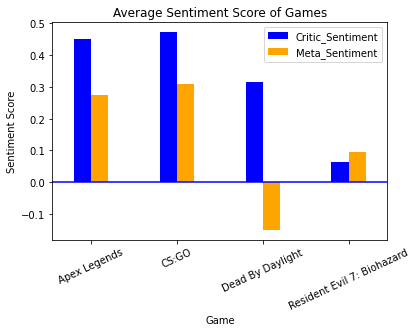

<Figure size 720x1440 with 0 Axes>

In [ ]:
#@title Average Sentiment Score of Games from Critics and Meta Users
ax = df_mean.plot(kind='bar', x='Game', y=['Critic_Sentiment', 'Meta_Sentiment'], color=['blue', 'orange'], position=0.5, width=0.4)
ax.set_ylabel('Sentiment Score')
ax.set_title('Average Sentiment Score of Games')
ax.legend()
plt.axhline(y=0.0, color='b')
plt.xticks(rotation=25)
plt.figure(figsize=(10,20))
plt.show()

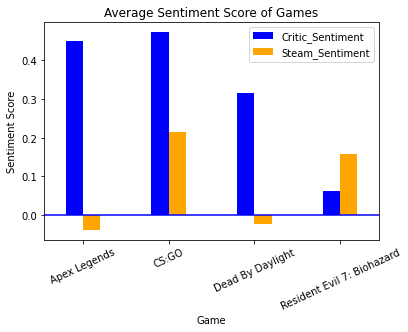

<Figure size 720x1440 with 0 Axes>

In [ ]:
#@title Average Sentiment of Games from Critic and Steam
ax = df_mean.plot(kind='bar', x='Game', y=['Critic_Sentiment', 'Steam_Sentiment'], color=['blue', 'orange'], position=0.5, width=0.4)
ax.set_ylabel('Sentiment Score')
ax.set_title('Average Sentiment Score of Games')
ax.legend()
plt.axhline(y=0.0, color='b')
plt.xticks(rotation=25)
plt.figure(figsize=(10,20))
plt.show()

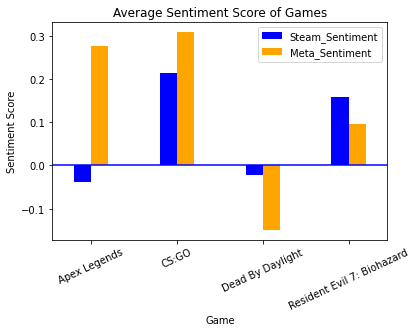

<Figure size 720x1440 with 0 Axes>

In [ ]:
#@title Average Sentiment Score of Games from Steam Players and Meta Users
ax = df_mean.plot(kind='bar', x='Game', y=['Steam_Sentiment', 'Meta_Sentiment'], color=['blue', 'orange'], position=0.5, width=0.4)
ax.set_ylabel('Sentiment Score')
ax.set_title('Average Sentiment Score of Games')
ax.legend()
plt.axhline(y=0.0, color='b')
plt.xticks(rotation=25)
plt.figure(figsize=(10,20))
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'CS:GO'),
  Text(1, 0, 'Apex Legends'),
  Text(2, 0, 'Dead By Daylight'),
  Text(3, 0, 'Resident Evil 7: Biohazard')])

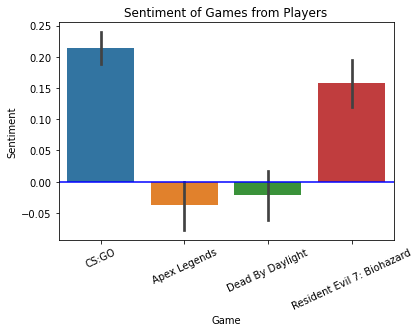

In [ ]:
#@title Sentiment of Steam Players
sns.barplot(data=dfSteam, x='Game', y='Sentiment').set(title='Sentiment of Games from Players')
plt.axhline(y=0.0, color='b')
plt.xticks(rotation=25)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'CS:GO'),
  Text(1, 0, 'Apex Legends'),
  Text(2, 0, 'Dead By Daylight'),
  Text(3, 0, 'Resident Evil 7: Biohazard')])

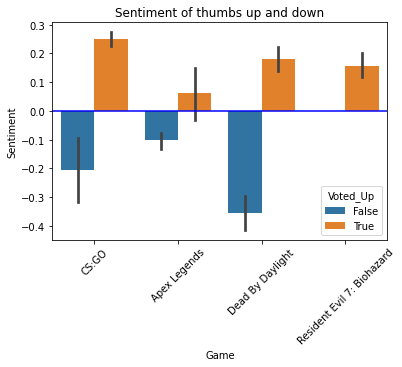

In [ ]:
#@title Sentiment of Steam Players
sns.barplot(data=dfSteam, x='Game',y='Sentiment', hue='Voted_Up').set(title='Sentiment of thumbs up and down')
plt.axhline(y=0.0, color='b')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

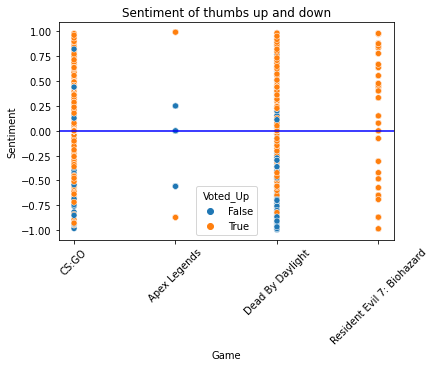

In [ ]:
#@title Players Rating Thumbs Up or Down
sns.scatterplot(data=dfSteam, x='Game',y='Sentiment', hue='Voted_Up').set(title='Sentiment of thumbs up and down')
plt.axhline(y=0.0, color='b')
plt.xticks(rotation=45)